In [1]:
import tensorflow as tf

from smot.jupyter import model_reports
from smot.problems.mnist.LeNet5 import lenet5_lib

In [2]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = lenet5_lib.load_LeNet5_datasets()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

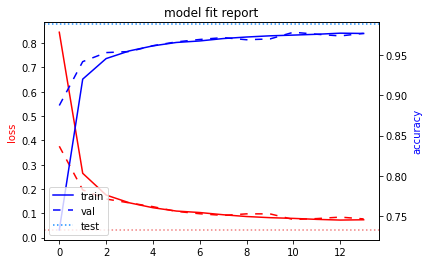

In [3]:
model = lenet5_lib.build_LeNet5_model()

# Print the model summary.
model.summary()

batch_size = 128
validation_split = 0.2
epochs = 50

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    validation_split=validation_split,
)
datagen.fit(x_train)

training_generator = datagen.flow(
    x_train,
    y_train,
    subset="training",
    batch_size=batch_size,
)
validation_generator = datagen.flow(
    x_train,
    y_train,
    subset="validation",
    batch_size=batch_size,
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
]

history = model.fit(
    training_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
    model=model,
    history=history,
    test_data=(x_test, y_test),
)